In [13]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To Scale our data
from sklearn.preprocessing import scale
# To perform KMeans clustering 
from sklearn.cluster import KMeans
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [14]:
# Loading the data using Pandas
df_country = pd.read_csv('Country-data.csv')
df_country

country  child_mort  exports  health  imports  \
0                       Afghanistan        90.2    10.00    7.58     44.9   
1                           Albania        16.6    28.00    6.55     48.6   
2                           Algeria        27.3    38.40    4.17     31.4   
3                            Angola       119.0    62.30    2.85     42.9   
4               Antigua and Barbuda        10.3    45.50    6.03     58.9   
5                         Argentina        14.5    18.90    8.10     16.0   
6                           Armenia        18.1    20.80    4.40     45.3   
7                         Australia         4.8    19.80    8.73     20.9   
8                           Austria         4.3    51.30   11.00     47.8   
9                        Azerbaijan        39.2    54.30    5.88     20.7   
10                          Bahamas        13.8    35.00    7.89     43.7   
11                          Bahrain         8.6    69.50    4.97     50.9   
12                       Bangladesh        49.4    16.00    3.52     21.8   
13                         Barbados        14.2    39.50    7.97     48.7   
14                          Belarus         5.5    51.40    5.61     64.5   
15                          Belgium         4.5    76.40   10.70     74.7   
16                           Belize        18.8    58.20    5.20     57.5   
17                            Benin       111.0    23.80    4.10     37.2   
18                           Bhutan        42.7    42.50    5.20     70.7   
19                          Bolivia        46.6    41.20    4.84     34.3   
20           Bosnia and Herzegovina         6.9    29.70   11.10     51.3   
21                         Botswana        52.5    43.60    8.30     51.3   
22                           Brazil        19.8    10.70    9.01     11.8   
23                           Brunei        10.5    67.40    2.84     28.0   
24                         Bulgaria        10.8    50.20    6.87     53.0   
25                     Burkina Faso       116.0    19.20    6.74     29.6   
26                          Burundi        93.6     8.92   11.60     39.2   
27                         Cambodia        44.4    54.10    5.68     59.5   
28                         Cameroon       108.0    22.20    5.13     27.0   
29                           Canada         5.6    29.10   11.30     31.0   
..                              ...         ...      ...     ...      ...   
137                    South Africa        53.7    28.60    8.94     27.4   
138                     South Korea         4.1    49.40    6.93     46.2   
139                           Spain         3.8    25.50    9.54     26.8   
140                       Sri Lanka        11.2    19.60    2.94     26.8   
141  St. Vincent and the Grenadines        20.7    26.90    4.47     57.1   
142                           Sudan        76.7    19.70    6.32     17.2   
143                        Suriname        24.1    52.50    7.01     38.4   
144                          Sweden         3.0    46.20    9.63     40.7   
145                     Switzerland         4.5    64.00   11.50     53.3   
146                      Tajikistan        52.4    14.90    5.98     58.6   
147                        Tanzania        71.9    18.70    6.01     29.1   
148                        Thailand        14.9    66.50    3.88     60.8   
149                     Timor-Leste        62.6     2.20    9.12     27.8   
150                            Togo        90.3    40.20    7.65     57.3   
151                           Tonga        17.4    12.40    5.07     60.3   
152                         Tunisia        17.4    50.50    6.21     55.3   
153                          Turkey        19.1    20.40    6.74     25.5   
154                    Turkmenistan        62.0    76.30    2.50     44.5   
155                          Uganda        81.0    17.10    9.01     28.6   
156                         Ukraine        11.7    47.10    7.72     51.1   
157            United Ar

#### Data Inspection

In [15]:
# The entire information that needs to be inspected
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [16]:
# Head
df_country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [17]:
# Shape
df_country.shape

(167, 10)

In [18]:
# Describe
df_country.describe

<bound method NDFrame.describe of                             country  child_mort  exports  health  imports  \
0                       Afghanistan        90.2    10.00    7.58     44.9   
1                           Albania        16.6    28.00    6.55     48.6   
2                           Algeria        27.3    38.40    4.17     31.4   
3                            Angola       119.0    62.30    2.85     42.9   
4               Antigua and Barbuda        10.3    45.50    6.03     58.9   
5                         Argentina        14.5    18.90    8.10     16.0   
6                           Armenia        18.1    20.80    4.40     45.3   
7                         Australia         4.8    19.80    8.73     20.9   
8                           Austria         4.3    51.30   11.00     47.8   
9                        Azerbaijan        39.2    54.30    5.88     20.7   
10                          Bahamas        13.8    35.00    7.89     43.7   
11                          Bahrain       

#### Data Cleaning

In [19]:
#Checking if data has any nulls
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No NULL values are Observed

## EDA - Visualization

(9.5, -0.5)

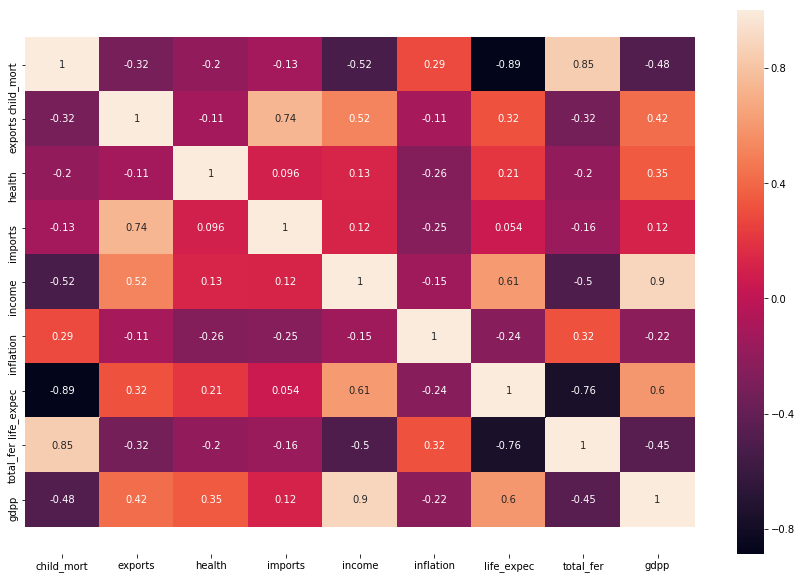

In [20]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))        
ax = sns.heatmap(df_country.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Following are the inferences from the above heatmap

1. child_mortality and life_expentency are highly correlated with correlation of -0.89
2. child_mortality and total_fertility are highly correlated with correlation of 0.85
3. imports and exports are highly correlated with correlation of 0.74
4. life_expentency and total_fertility are highly correlated with correlation of -0.76

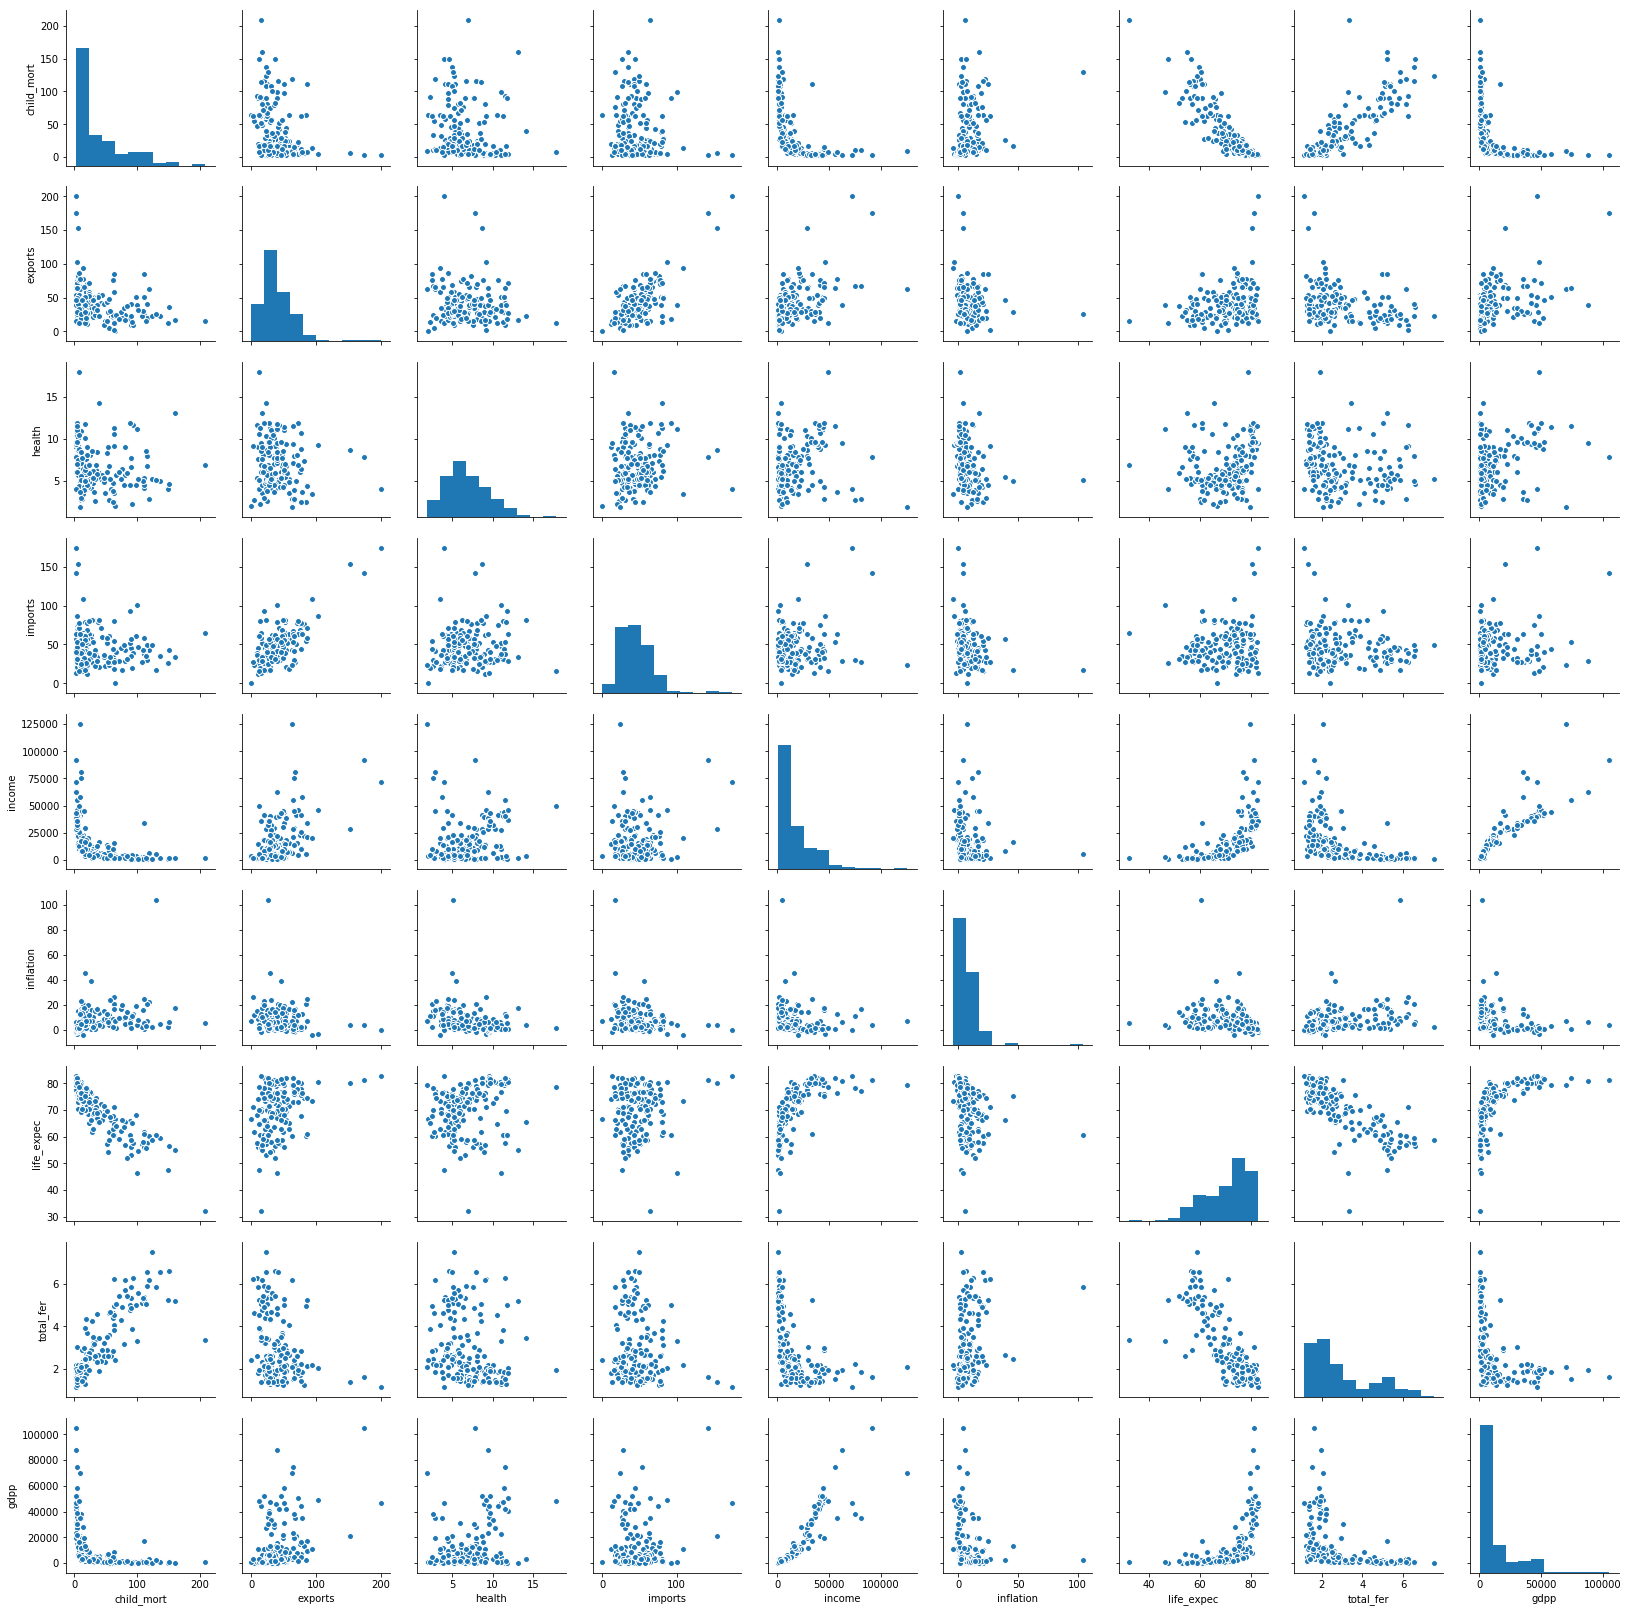

In [22]:
# Pairplot of all numeric columns

sns.pairplot(df_country

In [23]:
# Converting exports,imports and health spending percentages to absolute values.

df_country['exports'] = df_country['exports'] * df_country['gdpp']/100
df_country['imports'] = df_country['imports'] * df_country['gdpp']/100
df_country['health'] = df_country['health'] * df_country['gdpp']/100

In [24]:
df_country.head(5)

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [25]:
# Dropping Country field as final dataframe will only contain data columns

df_country_drop = df_country.copy()
country = df_country_drop.pop('country')
df_country_drop.head()

child_mort  exports    health   imports  income  inflation  life_expec  \
0        90.2    55.30   41.9174   248.297    1610       9.44        56.2   
1        16.6  1145.20  267.8950  1987.740    9930       4.49        76.3   
2        27.3  1712.64  185.9820  1400.440   12900      16.10        76.5   
3       119.0  2199.19  100.6050  1514.370    5900      22.40        60.1   
4        10.3  5551.00  735.6600  7185.800   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

## Standardising the Data

In [26]:
# Standardising continuous features
df = df_country_drop[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
stan_df=(df-df.mean())/df.std()
df_country_drop = df_country_drop.drop(['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'], 1)
df_country_drop = pd.concat([df_country_drop,stan_df],axis=1)
df_country_drop.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.287660 -0.409779 -0.563346 -0.430979 -0.805822   0.156864   -1.614237   
1   -0.537333 -0.349141 -0.437901 -0.312737 -0.374243  -0.311411    0.645924   
2   -0.272015 -0.317571 -0.483372 -0.352660 -0.220182   0.786908    0.668413   
3    2.001787 -0.290501 -0.530767 -0.344915 -0.583289   1.382894   -1.175698   
4   -0.693548 -0.104019 -0.178234  0.040613  0.101427  -0.599944    0.702147   

   total_fer      gdpp  
0   1.897176 -0.677143  
1  -0.857394 -0.484167  
2  -0.038289 -0.463980  
3   2.121770 -0.514720  
4  -0.540321 -0.041692

## PCA 

Doing PCA because we want to remove the redundancies in the data and find the most important directions where the data was aligned.Let's use PCA for dimensionality reduction as from the heatmap it is evident that correlation exists between the attributes.

In [30]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [32]:
# PCA on the data
pca.fit(df_country_drop)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [33]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [34]:
pca.explained_variance_ratio_

array([  5.89372984e-01,   1.84451685e-01,   9.91147170e-02,
         6.07227801e-02,   3.02917253e-02,   2.45982702e-02,
         9.39743701e-03,   1.55641971e-03,   4.93981394e-04])

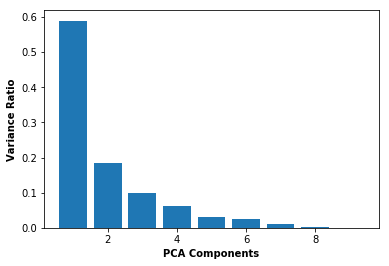

In [35]:
# Variance Ratio bar plot for each PCA components.

ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

## Screeplot

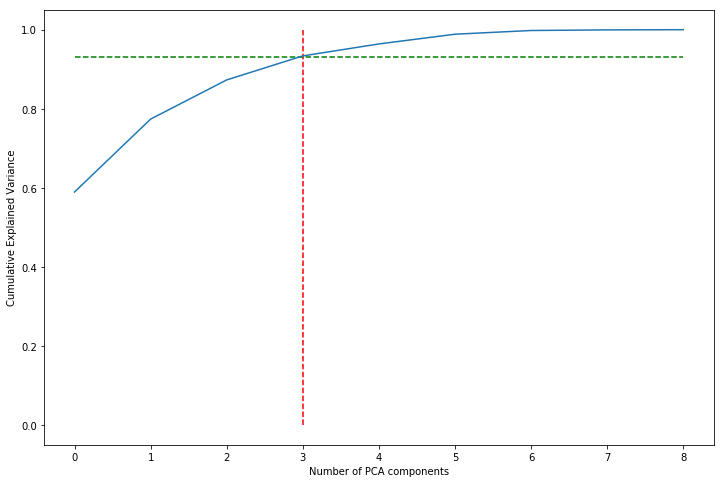

In [36]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

In [38]:
colnames = list(df_country_drop.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

Feature       PC1       PC2
0  child_mort -0.316392  0.476267
1     exports  0.342887  0.397311
2      health  0.358535  0.155053
3     imports  0.344865  0.370781
4      income  0.380041  0.128384
5   inflation -0.143085  0.221261
6  life_expec  0.343857 -0.369820
7   total_fer -0.302842  0.459715
8        gdpp  0.399988  0.200624

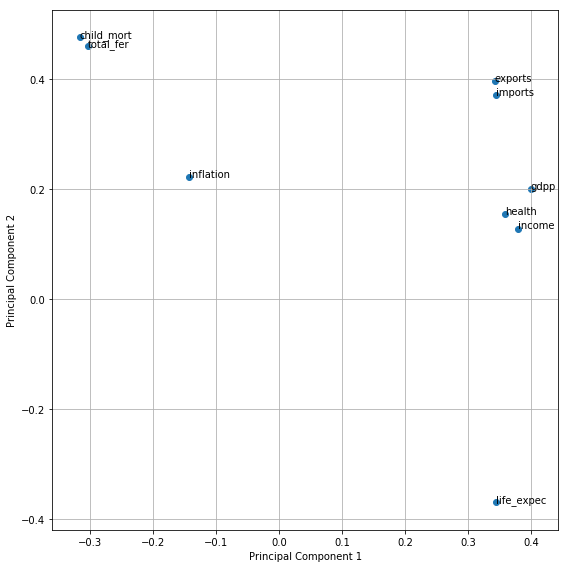

In [39]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.grid()
plt.show()

In [41]:
#Using Incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

df_train_pca = pca_final.fit_transform(df_country_drop)
df_pca = pd.DataFrame(df_train_pca)
df_pca.columns = ['PC1', 'PC2','PC3','PC4']
df_pca

PC1       PC2       PC3       PC4
0   -2.628741  1.467671 -0.544861  0.236556
1   -0.023774 -1.431511 -0.009052 -0.441593
2   -0.457883 -0.676759  0.964950 -0.175860
3   -2.715414  2.169493  0.596001  0.437603
4    0.646832 -1.023420 -0.243438 -0.266711
5    0.036338 -0.682569  1.460967  0.065870
6   -0.333272 -1.275197  0.190200 -0.499932
7    3.174813 -0.237658 -0.168035  1.664689
8    3.806688  0.261826 -0.296445  0.971483
9   -0.466074 -0.492579  0.606781 -0.257742
10   1.495083 -0.424608 -0.556127  0.224294
11   1.466881 -0.324758  0.425272 -0.117610
12  -1.012159 -0.712307 -0.105305 -0.385599
13   0.841985 -1.006874 -0.412313 -0.146078
14  -0.014491 -0.983482  0.891678 -0.503612
15   3.949225  0.835146 -0.294283  0.243161
16  -0.402863 -0.921723 -0.493399 -0.368944
17  -2.357917  1.169720 -1.238256  0.237972
18  -0.713922 -0.768422 -0.123585 -0.361714
19  -1.015874 -0.427898  0.058232 -0.203702
20   0.250452 -1.695560 -0.238128 -0.460853
21  -1.126166  0.399736 -0.237054 -0.137149
22   0.165676 -1.015799  0.273430  0.026504
23   2.690607  0.375698  1.617335  0.305792
24   0.278791 -1.318955 -0.313930 -0.427491
25  -2.744357  1.662123 -0.844210  0.326254
26  -2.755301  1.623950 -0.294770  0.315582
27  -1.176422 -0.493138 -0.567978 -0.346320
28  -2.432583  1.285966 -1.221149  0.194231
29   3.387575 -0.065169 -0.098656  1.569573
..        ...       ...       ...       ...
137 -1.174257  0.354637 -0.532495 -0.094197
138  1.750920 -1.019354  0.080269 -0.091607
139  2.238325 -0.998376 -0.201016  0.707195
140 -0.544729 -0.950298  1.580625 -0.396057
141 -0.225725 -0.985197 -0.162926 -0.401603
142 -2.011360  0.846198  0.695030  0.147090
143 -0.197575 -0.566515  0.038056 -0.197292
144  3.797115  0.385747 -0.270168  1.153059
145  6.247969  1.852844 -0.511879  1.574791
146 -1.372902 -0.166722  0.284385 -0.187607
147 -2.271376  1.004014 -0.398847  0.138675
148  0.172920 -1.397541 -0.000499 -0.521835
149 -2.002246  1.082025  1.382694  0.436575
150 -2.237693  0.902904 -1.185362  0.071784
151 -0.856163 -0.545101 -0.367672 -0.175779
152 -0.062684 -1.280882 -0.078068 -0.388805
153  0.327045 -1.063730  0.265352 -0.038443
154 -0.892803 -0.189966 -0.615669 -0.251520
155 -2.614207  1.458074 -0.407977  0.271817
156 -0.371912 -1.158947  0.665468 -0.552675
157  2.681870  0.539726  0.959377 -0.337258
158  2.599626 -0.365848 -0.178149  1.050659
159  3.776092  0.142196 -0.401483  3.186073
160  0.454195 -1.095916  0.047729 -0.019427
161 -1.028685 -0.565926  0.753652 -0.387717
162 -1.172199 -0.281328 -0.660121 -0.283974
163 -0.312115 -0.016810  3.650159  0.034430
164 -0.592512 -1.081056  0.524866 -0.506592
165 -1.797324  0.583978  1.177102  0.052162
166 -2.637470  1.566778 -0.176887  0.162464

[167 rows x 4 columns]

## Co-relation Matrix

There should not be any co-relation between the PC

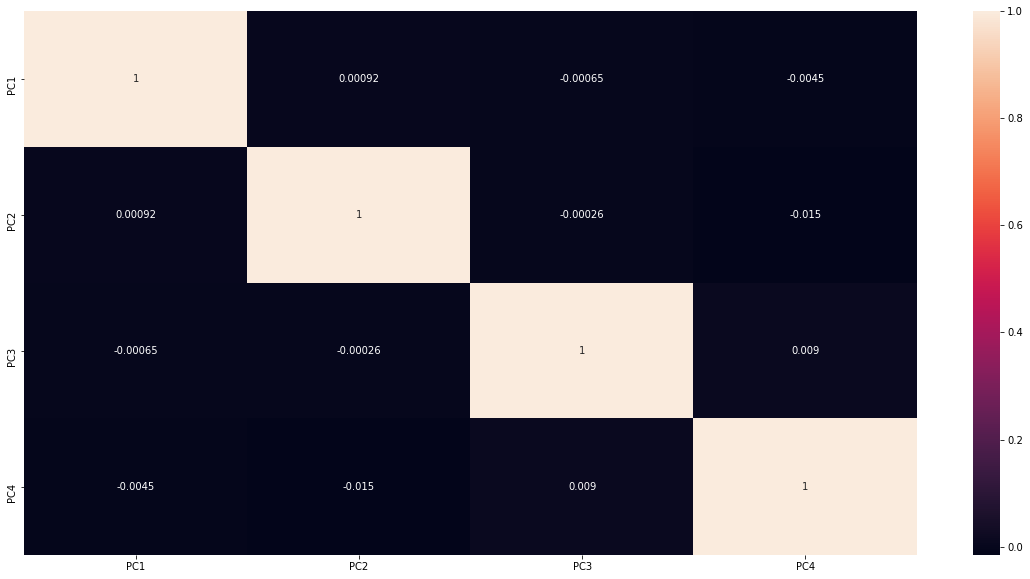

In [44]:
corrmat = np.corrcoef(df_train_pca.transpose())

plt.figure(figsize = (20,10))
sns.heatmap(df_pca.corr(),annot = True)
plt.show()

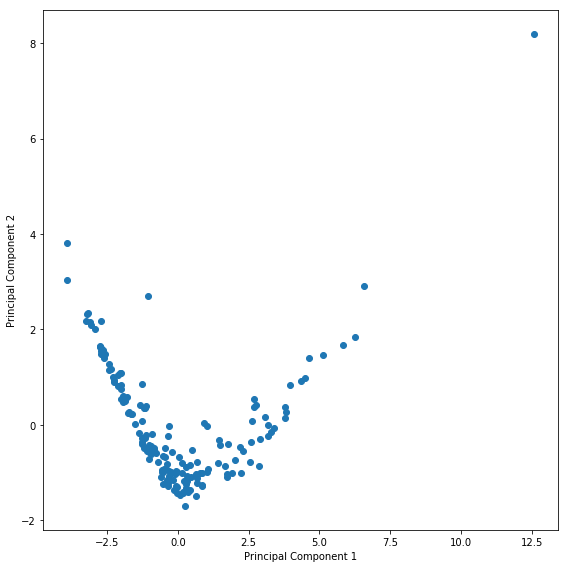

In [45]:
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca.PC1, df_pca.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [46]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("maximum correlation:",corrmat_nodiag.max(), ", minimum correlation: ", corrmat_nodiag.min(),)

maximum correlation: 0.00895942127688 , minimum correlation:  -0.0153022665108


The Co-relation are almost zero

In [47]:
country = pd.DataFrame(country)
country

country
0                       Afghanistan
1                           Albania
2                           Algeria
3                            Angola
4               Antigua and Barbuda
5                         Argentina
6                           Armenia
7                         Australia
8                           Austria
9                        Azerbaijan
10                          Bahamas
11                          Bahrain
12                       Bangladesh
13                         Barbados
14                          Belarus
15                          Belgium
16                           Belize
17                            Benin
18                           Bhutan
19                          Bolivia
20           Bosnia and Herzegovina
21                         Botswana
22                           Brazil
23                           Brunei
24                         Bulgaria
25                     Burkina Faso
26                          Burundi
27                         Cambodia
28                         Cameroon
29                           Canada
..                              ...
137                    South Africa
138                     South Korea
139                           Spain
140                       Sri Lanka
141  St. Vincent and the Grenadines
142                           Sudan
143                        Suriname
144                          Sweden
145                     Switzerland
146                      Tajikistan
147                        Tanzania
148                        Thailand
149                     Timor-Leste
150                            Togo
151                           Tonga
152                         Tunisia
153                          Turkey
154                    Turkmenistan
155                          Uganda
156                         Ukraine
157            United Arab Emirates
158                  United Kingdom
159                   United States
160                         Uruguay
161                      Uzbekistan
162                         Vanuatu
163                       Venezuela
164                         Vietnam
165                           Yemen
166                          Zambia

[167 rows x 1 columns]

In [48]:
df_pca = pd.concat([country, df_pca], axis=1)
df_pca

country       PC1       PC2       PC3       PC4
0                       Afghanistan -2.628741  1.467671 -0.544861  0.236556
1                           Albania -0.023774 -1.431511 -0.009052 -0.441593
2                           Algeria -0.457883 -0.676759  0.964950 -0.175860
3                            Angola -2.715414  2.169493  0.596001  0.437603
4               Antigua and Barbuda  0.646832 -1.023420 -0.243438 -0.266711
5                         Argentina  0.036338 -0.682569  1.460967  0.065870
6                           Armenia -0.333272 -1.275197  0.190200 -0.499932
7                         Australia  3.174813 -0.237658 -0.168035  1.664689
8                           Austria  3.806688  0.261826 -0.296445  0.971483
9                        Azerbaijan -0.466074 -0.492579  0.606781 -0.257742
10                          Bahamas  1.495083 -0.424608 -0.556127  0.224294
11                          Bahrain  1.466881 -0.324758  0.425272 -0.117610
12                       Bangladesh -1.012159 -0.712307 -0.105305 -0.385599
13                         Barbados  0.841985 -1.006874 -0.412313 -0.146078
14                          Belarus -0.014491 -0.983482  0.891678 -0.503612
15                          Belgium  3.949225  0.835146 -0.294283  0.243161
16                           Belize -0.402863 -0.921723 -0.493399 -0.368944
17                            Benin -2.357917  1.169720 -1.238256  0.237972
18                           Bhutan -0.713922 -0.768422 -0.123585 -0.361714
19                          Bolivia -1.015874 -0.427898  0.058232 -0.203702
20           Bosnia and Herzegovina  0.250452 -1.695560 -0.238128 -0.460853
21                         Botswana -1.126166  0.399736 -0.237054 -0.137149
22                           Brazil  0.165676 -1.015799  0.273430  0.026504
23                           Brunei  2.690607  0.375698  1.617335  0.305792
24                         Bulgaria  0.278791 -1.318955 -0.313930 -0.427491
25                     Burkina Faso -2.744357  1.662123 -0.844210  0.326254
26                          Burundi -2.755301  1.623950 -0.294770  0.315582
27                         Cambodia -1.176422 -0.493138 -0.567978 -0.346320
28                         Cameroon -2.432583  1.285966 -1.221149  0.194231
29                           Canada  3.387575 -0.065169 -0.098656  1.569573
..                              ...       ...       ...       ...       ...
137                    South Africa -1.174257  0.354637 -0.532495 -0.094197
138                     South Korea  1.750920 -1.019354  0.080269 -0.091607
139                           Spain  2.238325 -0.998376 -0.201016  0.707195
140                       Sri Lanka -0.544729 -0.950298  1.580625 -0.396057
141  St. Vincent and the Grenadines -0.225725 -0.985197 -0.162926 -0.401603
142                           Sudan -2.011360  0.846198  0.695030  0.147090
143                        Suriname -0.197575 -0.566515  0.038056 -0.197292
144                          Sweden  3.797115  0.385747 -0.270168  1.153059
145                     Switzerland  6.247969  1.852844 -0.511879  1.574791
146                      Tajikistan -1.372902 -0.166722  0.284385 -0.187607
147                        Tanzania -2.271376  1.004014 -0.398847  0.138675
148                        Thailand  0.172920 -1.397541 -0.000499 -0.521835
149                     Timor-Leste -2.002246  1.082025  1.382694  0.436575
150                            Togo -2.237693  0.902904 -1.185362  0.071784
151                           Tonga -0.856163 -0.545101 -0.367672 -0.175779
152                         Tunisia -0.062684 -1.280882 -0.078068 -0.388805
153                          Turkey  0.327045 -1.063730  0.265352 -0.038443
154                    Turkmenistan -0.892803 -0.189966 -0.615669 -0.251520
155                          Uganda -2.614207  1.458074 -0.407977  0.271817
156                         Ukraine -0.371912 -1.158947  0.665468 -0.552675
157            United Arab Emirates  2.681870  0.539726  0.959377 -0.337258


## Outliers

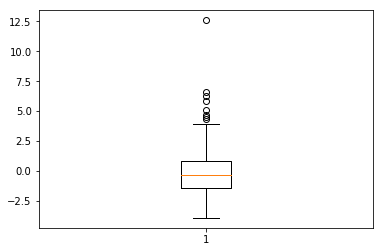

In [49]:
plt.boxplot(df_pca.PC1)
Q1 = df_pca.PC1.quantile(0.25)
Q3 = df_pca.PC1.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC1 >= Q1 - 1.5*IQR) & (df_pca.PC1 <= Q3 + 1.5*IQR)]
plt.show()

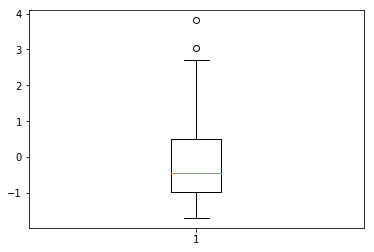

In [50]:
plt.boxplot(df_pca.PC2)
Q1 = df_pca.PC2.quantile(0.25)
Q3 = df_pca.PC2.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC2 >= Q1 - 1.5*IQR) & (df_pca.PC2 <= Q3 + 1.5*IQR)]
plt.show()

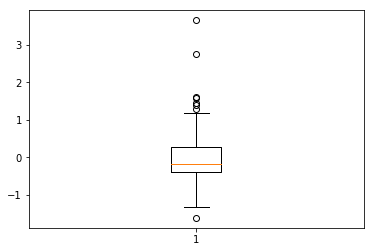

In [51]:
plt.boxplot(df_pca.PC3)
Q1 = df_pca.PC3.quantile(0.25)
Q3 = df_pca.PC3.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC3 >= Q1 - 1.5*IQR) & (df_pca.PC3 <= Q3 + 1.5*IQR)]
plt.show()

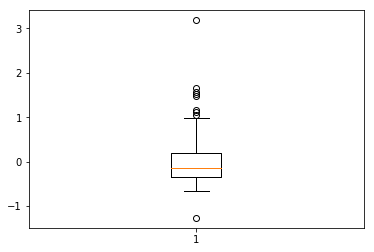

In [52]:
plt.boxplot(df_pca.PC4)
Q1 = df_pca.PC4.quantile(0.25)
Q3 = df_pca.PC4.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC4 >= Q1 - 1.5*IQR) & (df_pca.PC4 <= Q3 + 1.5*IQR)]
plt.show()

In [53]:
# Checking the shape of the data set
df_pca.shape

(140, 5)

In [54]:
# Making country dataset
country_1 = pd.DataFrame(df_pca["country"])

In [55]:
# Dropping country to proceed with clustering
df_pca = df_pca.drop(['country'],1)
df_pca

PC1       PC2       PC3       PC4
0   -2.628741  1.467671 -0.544861  0.236556
1   -0.023774 -1.431511 -0.009052 -0.441593
2   -0.457883 -0.676759  0.964950 -0.175860
3   -2.715414  2.169493  0.596001  0.437603
4    0.646832 -1.023420 -0.243438 -0.266711
6   -0.333272 -1.275197  0.190200 -0.499932
8    3.806688  0.261826 -0.296445  0.971483
9   -0.466074 -0.492579  0.606781 -0.257742
10   1.495083 -0.424608 -0.556127  0.224294
11   1.466881 -0.324758  0.425272 -0.117610
12  -1.012159 -0.712307 -0.105305 -0.385599
13   0.841985 -1.006874 -0.412313 -0.146078
14  -0.014491 -0.983482  0.891678 -0.503612
15   3.949225  0.835146 -0.294283  0.243161
16  -0.402863 -0.921723 -0.493399 -0.368944
17  -2.357917  1.169720 -1.238256  0.237972
18  -0.713922 -0.768422 -0.123585 -0.361714
19  -1.015874 -0.427898  0.058232 -0.203702
20   0.250452 -1.695560 -0.238128 -0.460853
21  -1.126166  0.399736 -0.237054 -0.137149
22   0.165676 -1.015799  0.273430  0.026504
24   0.278791 -1.318955 -0.313930 -0.427491
25  -2.744357  1.662123 -0.844210  0.326254
26  -2.755301  1.623950 -0.294770  0.315582
27  -1.176422 -0.493138 -0.567978 -0.346320
28  -2.432583  1.285966 -1.221149  0.194231
30  -0.523080 -0.977838 -0.561884 -0.365838
32  -3.177205  2.352707 -1.074703  0.539025
33   0.689382 -1.113784  0.497045 -0.064176
34  -0.129846 -1.361790  0.180155 -0.435515
..        ...       ...       ...       ...
129 -1.857375  0.493265 -0.916386  0.076929
130  0.184703 -1.429883  0.127865 -0.404415
131  0.664861 -0.768315 -0.835168 -0.662131
132 -3.214919  2.315596 -0.127703  0.351249
134  1.405523 -0.788561 -0.338362 -0.388400
135  2.035105 -0.724705 -0.394242 -0.077127
136 -1.513946  0.012243 -0.349530 -0.190506
137 -1.174257  0.354637 -0.532495 -0.094197
138  1.750920 -1.019354  0.080269 -0.091607
139  2.238325 -0.998376 -0.201016  0.707195
141 -0.225725 -0.985197 -0.162926 -0.401603
142 -2.011360  0.846198  0.695030  0.147090
143 -0.197575 -0.566515  0.038056 -0.197292
146 -1.372902 -0.166722  0.284385 -0.187607
147 -2.271376  1.004014 -0.398847  0.138675
148  0.172920 -1.397541 -0.000499 -0.521835
150 -2.237693  0.902904 -1.185362  0.071784
151 -0.856163 -0.545101 -0.367672 -0.175779
152 -0.062684 -1.280882 -0.078068 -0.388805
153  0.327045 -1.063730  0.265352 -0.038443
154 -0.892803 -0.189966 -0.615669 -0.251520
155 -2.614207  1.458074 -0.407977  0.271817
156 -0.371912 -1.158947  0.665468 -0.552675
157  2.681870  0.539726  0.959377 -0.337258
160  0.454195 -1.095916  0.047729 -0.019427
161 -1.028685 -0.565926  0.753652 -0.387717
162 -1.172199 -0.281328 -0.660121 -0.283974
164 -0.592512 -1.081056  0.524866 -0.506592
165 -1.797324  0.583978  1.177102  0.052162
166 -2.637470  1.566778 -0.176887  0.162464

[140 rows x 4 columns]

## Hopkins Statistics 

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set

In [59]:

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [60]:
# Hopkins score

hopkins(df_pca)

0.84392837198323889

0.84 is a good Hopkins score for Clustering.

## Model Building

#### K- means Clustering

In [68]:
# Kmeans with K=3
model_clus4 = KMeans(n_clusters = 3, max_iter=50)
model_clus4.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

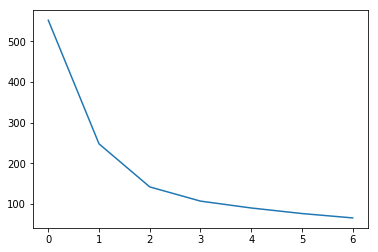

In [62]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50,random_state= 100)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

Looking at the above elbow curve it looks good to proceed with either 4 or 5 clusters.

### Silhouette Analysis
Value of the silhouette score range is in between -1 to 1.

A score closer to 1 : The data point is very similar to other data points in the cluster

A score closer to -1 : The data point is not similar to the data points in its cluster.

In [63]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

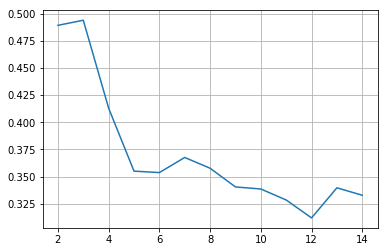

In [64]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.grid()
plt.show()

## Sum of Squared Distance

In [65]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

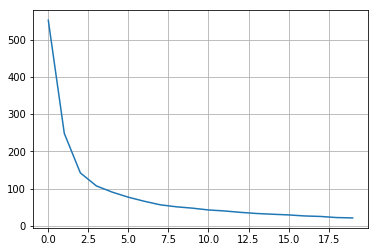

In [66]:
plt.plot(ssd)
plt.grid()
plt.show()

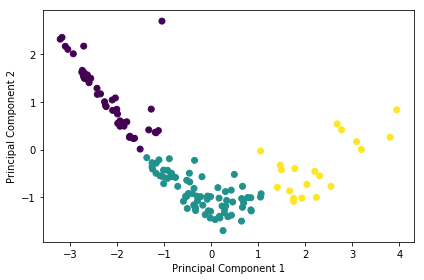

In [69]:
plt.scatter(df_pca['PC1'], df_pca['PC2'],c=model_clus4.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

## Analysis of Clusters Formed

In [71]:
df_pca.index = pd.RangeIndex(len(df_pca.index))
df_pca_km = pd.concat([df_pca, pd.Series(model_clus4.labels_)], axis=1)
df_pca_km.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']
df_pca_km

PC1       PC2       PC3       PC4  ClusterID
0   -2.628741  1.467671 -0.544861  0.236556          0
1   -0.023774 -1.431511 -0.009052 -0.441593          1
2   -0.457883 -0.676759  0.964950 -0.175860          1
3   -2.715414  2.169493  0.596001  0.437603          0
4    0.646832 -1.023420 -0.243438 -0.266711          1
5   -0.333272 -1.275197  0.190200 -0.499932          1
6    3.806688  0.261826 -0.296445  0.971483          2
7   -0.466074 -0.492579  0.606781 -0.257742          1
8    1.495083 -0.424608 -0.556127  0.224294          2
9    1.466881 -0.324758  0.425272 -0.117610          2
10  -1.012159 -0.712307 -0.105305 -0.385599          1
11   0.841985 -1.006874 -0.412313 -0.146078          1
12  -0.014491 -0.983482  0.891678 -0.503612          1
13   3.949225  0.835146 -0.294283  0.243161          2
14  -0.402863 -0.921723 -0.493399 -0.368944          1
15  -2.357917  1.169720 -1.238256  0.237972          0
16  -0.713922 -0.768422 -0.123585 -0.361714          1
17  -1.015874 -0.427898  0.058232 -0.203702          1
18   0.250452 -1.695560 -0.238128 -0.460853          1
19  -1.126166  0.399736 -0.237054 -0.137149          0
20   0.165676 -1.015799  0.273430  0.026504          1
21   0.278791 -1.318955 -0.313930 -0.427491          1
22  -2.744357  1.662123 -0.844210  0.326254          0
23  -2.755301  1.623950 -0.294770  0.315582          0
24  -1.176422 -0.493138 -0.567978 -0.346320          1
25  -2.432583  1.285966 -1.221149  0.194231          0
26  -0.523080 -0.977838 -0.561884 -0.365838          1
27  -3.177205  2.352707 -1.074703  0.539025          0
28   0.689382 -1.113784  0.497045 -0.064176          1
29  -0.129846 -1.361790  0.180155 -0.435515          1
..        ...       ...       ...       ...        ...
110 -1.857375  0.493265 -0.916386  0.076929          0
111  0.184703 -1.429883  0.127865 -0.404415          1
112  0.664861 -0.768315 -0.835168 -0.662131          1
113 -3.214919  2.315596 -0.127703  0.351249          0
114  1.405523 -0.788561 -0.338362 -0.388400          2
115  2.035105 -0.724705 -0.394242 -0.077127          2
116 -1.513946  0.012243 -0.349530 -0.190506          0
117 -1.174257  0.354637 -0.532495 -0.094197          0
118  1.750920 -1.019354  0.080269 -0.091607          2
119  2.238325 -0.998376 -0.201016  0.707195          2
120 -0.225725 -0.985197 -0.162926 -0.401603          1
121 -2.011360  0.846198  0.695030  0.147090          0
122 -0.197575 -0.566515  0.038056 -0.197292          1
123 -1.372902 -0.166722  0.284385 -0.187607          1
124 -2.271376  1.004014 -0.398847  0.138675          0
125  0.172920 -1.397541 -0.000499 -0.521835          1
126 -2.237693  0.902904 -1.185362  0.071784          0
127 -0.856163 -0.545101 -0.367672 -0.175779          1
128 -0.062684 -1.280882 -0.078068 -0.388805          1
129  0.327045 -1.063730  0.265352 -0.038443          1
130 -0.892803 -0.189966 -0.615669 -0.251520          1
131 -2.614207  1.458074 -0.407977  0.271817          0
132 -0.371912 -1.158947  0.665468 -0.552675          1
133  2.681870  0.539726  0.959377 -0.337258          2
134  0.454195 -1.095916  0.047729 -0.019427          1
135 -1.028685 -0.565926  0.753652 -0.387717          1
136 -1.172199 -0.281328 -0.660121 -0.283974          1
137 -0.592512 -1.081056  0.524866 -0.506592          1
138 -1.797324  0.583978  1.177102  0.052162          0
139 -2.637470  1.566778 -0.176887  0.162464          0

[140 rows x 5 columns]

In [72]:
df_pca_km.shape

(140, 5)

In [95]:
# Merging country and the above data set
df_pca_km = pd.merge(df_pca_km,country_1,on=df_pca_km['PC1'])
df_pca_km = df_pca_km.drop('country_y', 1)
df_pca_km

PC1       PC2       PC3       PC4  ClusterID  \
0   -2.628741  1.467671 -0.544861  0.236556          0   
1   -0.023774 -1.431511 -0.009052 -0.441593          1   
2   -0.457883 -0.676759  0.964950 -0.175860          1   
3   -2.715414  2.169493  0.596001  0.437603          0   
4    0.646832 -1.023420 -0.243438 -0.266711          1   
5   -0.333272 -1.275197  0.190200 -0.499932          1   
6    3.806688  0.261826 -0.296445  0.971483          2   
7   -0.466074 -0.492579  0.606781 -0.257742          1   
8    1.495083 -0.424608 -0.556127  0.224294          2   
9    1.466881 -0.324758  0.425272 -0.117610          2   
10  -1.012159 -0.712307 -0.105305 -0.385599          1   
11   0.841985 -1.006874 -0.412313 -0.146078          1   
12  -0.014491 -0.983482  0.891678 -0.503612          1   
13   3.949225  0.835146 -0.294283  0.243161          2   
14  -0.402863 -0.921723 -0.493399 -0.368944          1   
15  -2.357917  1.169720 -1.238256  0.237972          0   
16  -0.713922 -0.768422 -0.123585 -0.361714          1   
17  -1.015874 -0.427898  0.058232 -0.203702          1   
18   0.250452 -1.695560 -0.238128 -0.460853          1   
19  -1.126166  0.399736 -0.237054 -0.137149          0   
20   0.165676 -1.015799  0.273430  0.026504          1   
21   0.278791 -1.318955 -0.313930 -0.427491          1   
22  -2.744357  1.662123 -0.844210  0.326254          0   
23  -2.755301  1.623950 -0.294770  0.315582          0   
24  -1.176422 -0.493138 -0.567978 -0.346320          1   
25  -2.432583  1.285966 -1.221149  0.194231          0   
26  -0.523080 -0.977838 -0.561884 -0.365838          1   
27  -3.177205  2.352707 -1.074703  0.539025          0   
28   0.689382 -1.113784  0.497045 -0.064176          1   
29  -0.129846 -1.361790  0.180155 -0.435515          1   
..        ...       ...       ...       ...        ...   
110 -1.857375  0.493265 -0.916386  0.076929          0   
111  0.184703 -1.429883  0.127865 -0.404415          1   
112  0.664861 -0.768315 -0.835168 -0.662131          1   
113 -3.214919  2.315596 -0.127703  0.351249          0   
114  1.405523 -0.788561 -0.338362 -0.388400          2   
115  2.035105 -0.724705 -0.394242 -0.077127          2   
116 -1.513946  0.012243 -0.349530 -0.190506          0   
117 -1.174257  0.354637 -0.532495 -0.094197          0   
118  1.750920 -1.019354  0.080269 -0.091607          2   
119  2.238325 -0.998376 -0.201016  0.707195          2   
120 -0.225725 -0.985197 -0.162926 -0.401603          1   
121 -2.011360  0.846198  0.695030  0.147090          0   
122 -0.197575 -0.566515  0.038056 -0.197292          1   
123 -1.372902 -0.166722  0.284385 -0.187607          1   
124 -2.271376  1.004014 -0.398847  0.138675          0   
125  0.172920 -1.397541 -0.000499 -0.521835          1   
126 -2.237693  0.902904 -1.185362  0.071784          0   
127 -0.856163 -0.545101 -0.367672 -0.175779          1   
128 -0.062684 -1.280882 -0.078068 -0.388805          1   
129  0.327045 -1.063730  0.265352 -0.038443          1   
130 -0.892803 -0.189966 -0.615669 -0.251520          1   
131 -2.614207  1.458074 -0.407977  0.271817          0   
132 -0.371912 -1.158947  0.665468 -0.552675          1   
133  2.681870  0.539726  0.959377 -0.337258          2   
134  0.454195 -1.095916  0.047729 -0.019427          1   
135 -1.028685 -0.565926  0.753652 -0.387717          1   
136 -1.172199 -0.281328 -0.660121 -0.283974          1   
137 -0.592512 -1.081056  0.524866 -0.506592          1   
138 -1.797324  0.583978  1.177102  0.052162          0   
139 -2.637470  1.566778 -0.176887  0.162464          0   

                            country  
0                       Afghanistan  
1                           Albania  
2                           Algeria  
3                            Angola  
4               Antigua and Barbuda  
5                           Armenia  
6                           Austria  
7                        Azerbaijan  
8                           Bahamas  
9                           Bahra

In [97]:
df_country_clusterid1 = pd.merge(df_pca_km,df_country,on='country',how='inner')
df_country_clusterid1

PC1       PC2       PC3       PC4  ClusterID  \
0   -2.628741  1.467671 -0.544861  0.236556          0   
1   -0.023774 -1.431511 -0.009052 -0.441593          1   
2   -0.457883 -0.676759  0.964950 -0.175860          1   
3   -2.715414  2.169493  0.596001  0.437603          0   
4    0.646832 -1.023420 -0.243438 -0.266711          1   
5   -0.333272 -1.275197  0.190200 -0.499932          1   
6    3.806688  0.261826 -0.296445  0.971483          2   
7   -0.466074 -0.492579  0.606781 -0.257742          1   
8    1.495083 -0.424608 -0.556127  0.224294          2   
9    1.466881 -0.324758  0.425272 -0.117610          2   
10  -1.012159 -0.712307 -0.105305 -0.385599          1   
11   0.841985 -1.006874 -0.412313 -0.146078          1   
12  -0.014491 -0.983482  0.891678 -0.503612          1   
13   3.949225  0.835146 -0.294283  0.243161          2   
14  -0.402863 -0.921723 -0.493399 -0.368944          1   
15  -2.357917  1.169720 -1.238256  0.237972          0   
16  -0.713922 -0.768422 -0.123585 -0.361714          1   
17  -1.015874 -0.427898  0.058232 -0.203702          1   
18   0.250452 -1.695560 -0.238128 -0.460853          1   
19  -1.126166  0.399736 -0.237054 -0.137149          0   
20   0.165676 -1.015799  0.273430  0.026504          1   
21   0.278791 -1.318955 -0.313930 -0.427491          1   
22  -2.744357  1.662123 -0.844210  0.326254          0   
23  -2.755301  1.623950 -0.294770  0.315582          0   
24  -1.176422 -0.493138 -0.567978 -0.346320          1   
25  -2.432583  1.285966 -1.221149  0.194231          0   
26  -0.523080 -0.977838 -0.561884 -0.365838          1   
27  -3.177205  2.352707 -1.074703  0.539025          0   
28   0.689382 -1.113784  0.497045 -0.064176          1   
29  -0.129846 -1.361790  0.180155 -0.435515          1   
..        ...       ...       ...       ...        ...   
110 -1.857375  0.493265 -0.916386  0.076929          0   
111  0.184703 -1.429883  0.127865 -0.404415          1   
112  0.664861 -0.768315 -0.835168 -0.662131          1   
113 -3.214919  2.315596 -0.127703  0.351249          0   
114  1.405523 -0.788561 -0.338362 -0.388400          2   
115  2.035105 -0.724705 -0.394242 -0.077127          2   
116 -1.513946  0.012243 -0.349530 -0.190506          0   
117 -1.174257  0.354637 -0.532495 -0.094197          0   
118  1.750920 -1.019354  0.080269 -0.091607          2   
119  2.238325 -0.998376 -0.201016  0.707195          2   
120 -0.225725 -0.985197 -0.162926 -0.401603          1   
121 -2.011360  0.846198  0.695030  0.147090          0   
122 -0.197575 -0.566515  0.038056 -0.197292          1   
123 -1.372902 -0.166722  0.284385 -0.187607          1   
124 -2.271376  1.004014 -0.398847  0.138675          0   
125  0.172920 -1.397541 -0.000499 -0.521835          1   
126 -2.237693  0.902904 -1.185362  0.071784          0   
127 -0.856163 -0.545101 -0.367672 -0.175779          1   
128 -0.062684 -1.280882 -0.078068 -0.388805          1   
129  0.327045 -1.063730  0.265352 -0.038443          1   
130 -0.892803 -0.189966 -0.615669 -0.251520          1   
131 -2.614207  1.458074 -0.407977  0.271817          0   
132 -0.371912 -1.158947  0.665468 -0.552675          1   
133  2.681870  0.539726  0.959377 -0.337258          2   
134  0.454195 -1.095916  0.047729 -0.019427          1   
135 -1.028685 -0.565926  0.753652 -0.387717          1   
136 -1.172199 -0.281328 -0.660121 -0.283974          1   
137 -0.592512 -1.081056  0.524866 -0.506592          1   
138 -1.797324  0.583978  1.177102  0.052162          0   
139 -2.637470  1.566778 -0.176887  0.162464          0   

                            country  child_mort     exports     health  \
0                       Afghanistan        90.2     55.3000    41.9174   
1                           Albania        16.6   1145.2000   267.8950   
2                           Algeria        27.3   1712.6400   185.9820   
3                            Angola       119.0   2199.1900   100.6050   
4               Antigua and Barbuda        

In [98]:
km_clusters_child_mort = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).gdpp.mean())
km_clusters_PC1 = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).PC4.mean())

In [99]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp,km_clusters_PC1,km_clusters_PC2,km_clusters_PC3,km_clusters_PC4], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean","PC1_mean","PC2_mean","PC3_mean","PC4_mean"]
df.head()

ClusterID  child_mort_mean  exports_mean  health_mean  imports_mean  \
0          0        87.447727    940.282841   113.670425    857.833114   
1          1        22.417105   2616.788007   383.481663   2858.415672   
2          2         5.780000  15278.950000  2498.288000  13892.205000   
3          3              NaN           NaN          NaN           NaN   

    income_mean  inflation_mean  life_expec_mean  total_fer_mean  \
0   4038.295455        9.858523        59.825000        4.977500   
1  11405.526316        6.190250        72.867105        2.265658   
2  36900.000000        3.272700        79.085000        1.821500   
3           NaN             NaN              NaN             NaN   

      gdpp_mean  PC1_mean  PC2_mean  PC3_mean  PC4_mean  
0   1922.818182 -2.180612  1.109683 -0.364187  0.139408  
1   5890.947368 -0.208631 -0.902168  0.014931 -0.316229  
2  30690.000000  2.256231 -0.360594  0.012356  0.313494  
3           NaN       NaN       NaN       NaN       NaN

## Plotting

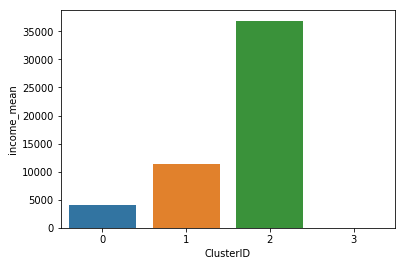

In [100]:
sns.barplot(x=df.ClusterID, y=df.income_mean)
plt.show()

Net income per person is the lowest in ClusterID = 0

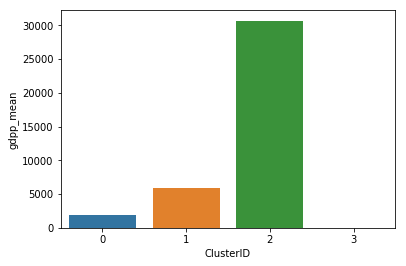

In [101]:
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
plt.show()

The GDP per capita is the lowest in ClusterID = 0

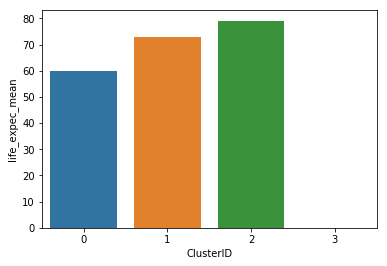

In [102]:
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
plt.show()

The average number of years a new born child would live is the lowest in ClusterID = 0

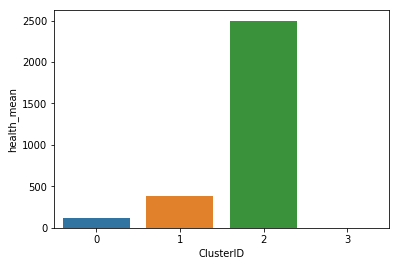

In [104]:
sns.barplot(x=df.ClusterID, y=df.health_mean)
plt.show()

Total health spending is the lowest in ClusterID = 0

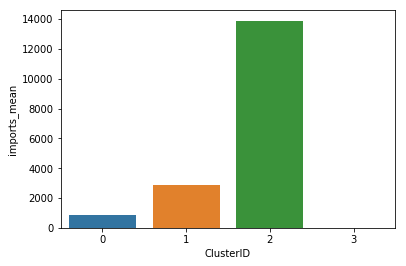

In [105]:
sns.barplot(x=df.ClusterID, y=df.imports_mean)
plt.show()

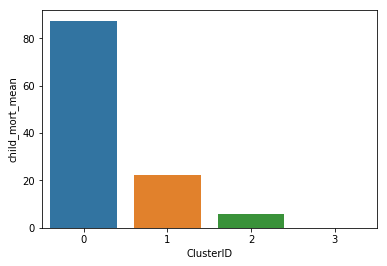

In [106]:
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
plt.show()


Child Mortality rate is the highest in ClusterID = 0

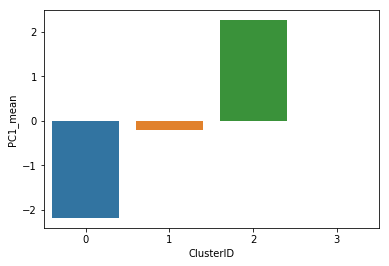

In [107]:
sns.barplot(x=df.ClusterID, y=df.PC1_mean)
plt.show()

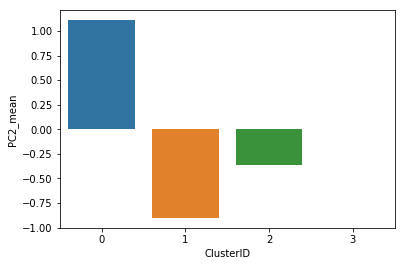

In [108]:
sns.barplot(x=df.ClusterID, y=df.PC2_mean)
plt.show()

## Hierarchical Clustering

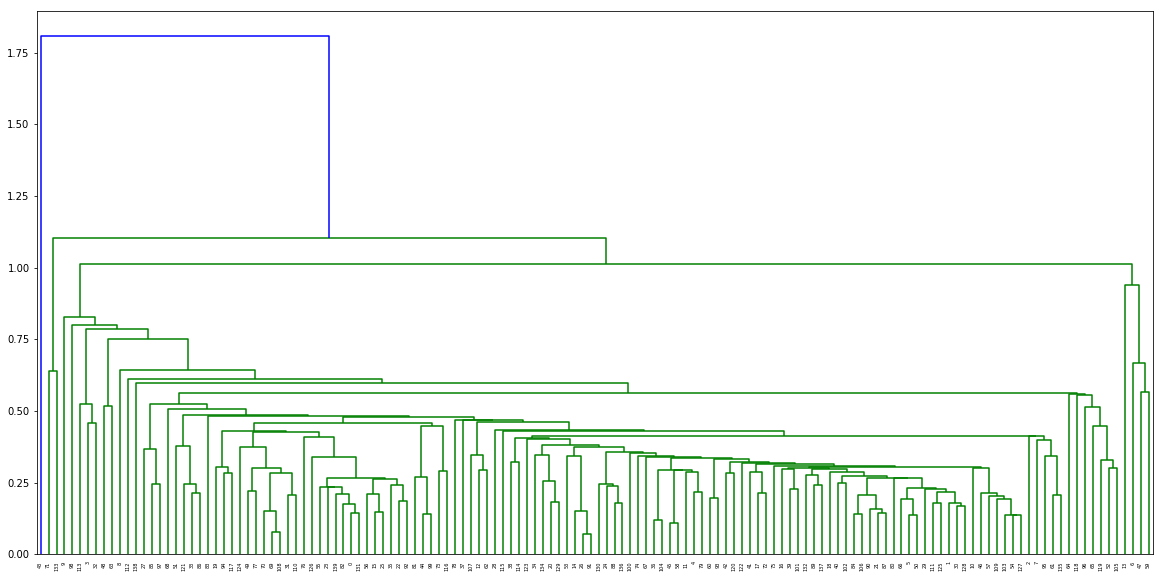

In [109]:
plt.figure(figsize = (20,10))
mergings = linkage(df_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

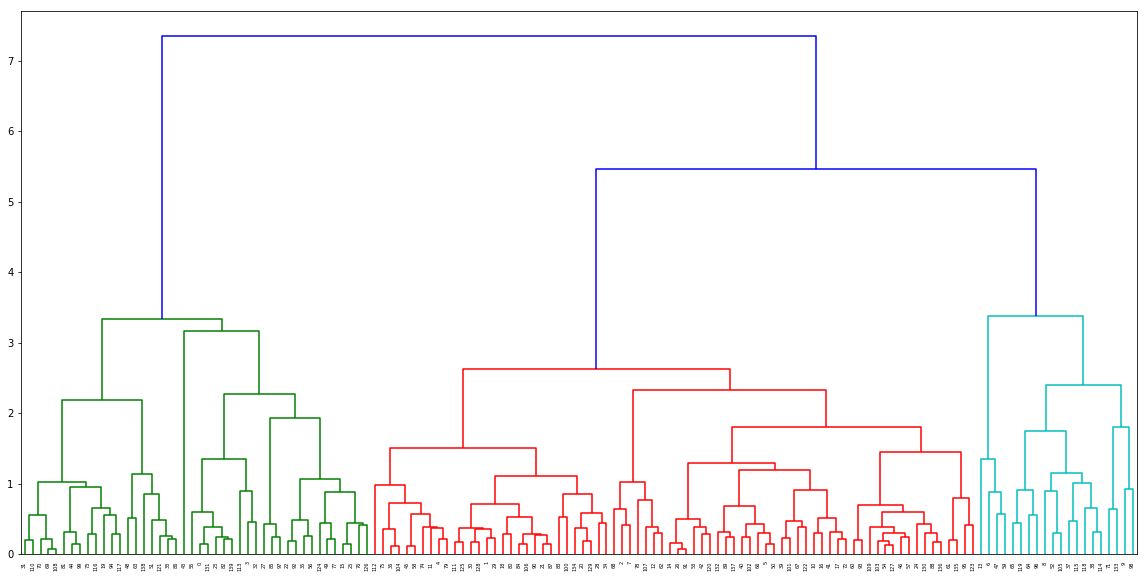

In [110]:

plt.figure(figsize = (20,10))
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [111]:
df_country_clusterid1

PC1       PC2       PC3       PC4  ClusterID  \
0   -2.628741  1.467671 -0.544861  0.236556          0   
1   -0.023774 -1.431511 -0.009052 -0.441593          1   
2   -0.457883 -0.676759  0.964950 -0.175860          1   
3   -2.715414  2.169493  0.596001  0.437603          0   
4    0.646832 -1.023420 -0.243438 -0.266711          1   
5   -0.333272 -1.275197  0.190200 -0.499932          1   
6    3.806688  0.261826 -0.296445  0.971483          2   
7   -0.466074 -0.492579  0.606781 -0.257742          1   
8    1.495083 -0.424608 -0.556127  0.224294          2   
9    1.466881 -0.324758  0.425272 -0.117610          2   
10  -1.012159 -0.712307 -0.105305 -0.385599          1   
11   0.841985 -1.006874 -0.412313 -0.146078          1   
12  -0.014491 -0.983482  0.891678 -0.503612          1   
13   3.949225  0.835146 -0.294283  0.243161          2   
14  -0.402863 -0.921723 -0.493399 -0.368944          1   
15  -2.357917  1.169720 -1.238256  0.237972          0   
16  -0.713922 -0.768422 -0.123585 -0.361714          1   
17  -1.015874 -0.427898  0.058232 -0.203702          1   
18   0.250452 -1.695560 -0.238128 -0.460853          1   
19  -1.126166  0.399736 -0.237054 -0.137149          0   
20   0.165676 -1.015799  0.273430  0.026504          1   
21   0.278791 -1.318955 -0.313930 -0.427491          1   
22  -2.744357  1.662123 -0.844210  0.326254          0   
23  -2.755301  1.623950 -0.294770  0.315582          0   
24  -1.176422 -0.493138 -0.567978 -0.346320          1   
25  -2.432583  1.285966 -1.221149  0.194231          0   
26  -0.523080 -0.977838 -0.561884 -0.365838          1   
27  -3.177205  2.352707 -1.074703  0.539025          0   
28   0.689382 -1.113784  0.497045 -0.064176          1   
29  -0.129846 -1.361790  0.180155 -0.435515          1   
..        ...       ...       ...       ...        ...   
110 -1.857375  0.493265 -0.916386  0.076929          0   
111  0.184703 -1.429883  0.127865 -0.404415          1   
112  0.664861 -0.768315 -0.835168 -0.662131          1   
113 -3.214919  2.315596 -0.127703  0.351249          0   
114  1.405523 -0.788561 -0.338362 -0.388400          2   
115  2.035105 -0.724705 -0.394242 -0.077127          2   
116 -1.513946  0.012243 -0.349530 -0.190506          0   
117 -1.174257  0.354637 -0.532495 -0.094197          0   
118  1.750920 -1.019354  0.080269 -0.091607          2   
119  2.238325 -0.998376 -0.201016  0.707195          2   
120 -0.225725 -0.985197 -0.162926 -0.401603          1   
121 -2.011360  0.846198  0.695030  0.147090          0   
122 -0.197575 -0.566515  0.038056 -0.197292          1   
123 -1.372902 -0.166722  0.284385 -0.187607          1   
124 -2.271376  1.004014 -0.398847  0.138675          0   
125  0.172920 -1.397541 -0.000499 -0.521835          1   
126 -2.237693  0.902904 -1.185362  0.071784          0   
127 -0.856163 -0.545101 -0.367672 -0.175779          1   
128 -0.062684 -1.280882 -0.078068 -0.388805          1   
129  0.327045 -1.063730  0.265352 -0.038443          1   
130 -0.892803 -0.189966 -0.615669 -0.251520          1   
131 -2.614207  1.458074 -0.407977  0.271817          0   
132 -0.371912 -1.158947  0.665468 -0.552675          1   
133  2.681870  0.539726  0.959377 -0.337258          2   
134  0.454195 -1.095916  0.047729 -0.019427          1   
135 -1.028685 -0.565926  0.753652 -0.387717          1   
136 -1.172199 -0.281328 -0.660121 -0.283974          1   
137 -0.592512 -1.081056  0.524866 -0.506592          1   
138 -1.797324  0.583978  1.177102  0.052162          0   
139 -2.637470  1.566778 -0.176887  0.162464          0   

                            country  child_mort     exports     health  \
0                       Afghanistan        90.2     55.3000    41.9174   
1                           Albania        16.6   1145.2000   267.8950   
2                           Algeria        27.3   1712.6400   185.9820   
3                            Angola       119.0   2199.1900   100.6050   
4               Antigua and Barbuda        

In [117]:

df1 = df_country_clusterid1.loc[df_country_clusterid1['ClusterID'] == 0]
result = pd.DataFrame(df1.country)
result

country
0          Afghanistan
3               Angola
15               Benin
19            Botswana
22        Burkina Faso
23             Burundi
25            Cameroon
27                Chad
31             Comoros
32    Congo, Dem. Rep.
33         Congo, Rep.
35       Cote d'Ivoire
43   Equatorial Guinea
44             Eritrea
48               Gabon
49              Gambia
51               Ghana
55              Guinea
56       Guinea-Bissau
63                Iraq
69               Kenya
70            Kiribati
73                 Lao
76             Lesotho
77             Liberia
81          Madagascar
82              Malawi
85                Mali
86          Mauritania
92          Mozambique
94             Namibia
97               Niger
99            Pakistan
108             Rwanda
110            Senegal
113       Sierra Leone
116    Solomon Islands
117       South Africa
121              Sudan
124           Tanzania
126               Togo
131             Uganda
138              Yemen
139             Zambia

### Conclusion

The countries that require help the most are listed below:
Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Lao, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Pakistan, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen and Zambia.

These countries have:

Very low rate of net income per person, GDP per capita, average number of years a new born child would live, total health spending and imports of goods and services.

Very high rate of measurement of the annual growth rate, number of children that would be born and child mortality rate.

It is clear that these countries require very quick aid in terms of money, education and services.